In [ ]:
tos

<center>
    
# Diplomatura en Ciencias de Datos 2021
# Árboles de decisión

  Ejemplo bancos

In [ ]:
# Manejo de dataframes
import pandas as pd

# operaciones numéricas
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Métodos de aprendizaje automático

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

#import pandas_profiling as pp
!pip install pandas-profiling==3.0.0


     |████████████████████████████████| 248 kB 7.5 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 675 kB 55.1 MB/s 
     |████████████████████████████████| 3.1 MB 59.1 MB/s 
     |████████████████████████████████| 102 kB 56.0 MB/s 
     |████████████████████████████████| 10.1 MB 23.3 MB/s 
     |████████████████████████████████| 636 kB 55.3 MB/s 
     |████████████████████████████████| 812 kB 61.4 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ce8b95d203f3902ad8b5ccb060a915d70b6643efd2b9143a431f2b9a272addac
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=6316c796e6ce18cc4e7f0e644820a5886cd228f5f232774bc8e8fceed4d4cf09
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

**Base de clientes de un banco**

TV: si tiene tarjeta visa

TC: si tiene tarjeta del banco

saldo res : saldo del ultimo resumen 

antc: antigüedad en la cuenta 

cons:	ultimos  consumos mensuales 

antig_pp:	antigüedad en prestamos personales 

endeu:	tasa de endeudamiento

conscateg:	consumo en categorías (4)

ESTADO_CIVIL:	1-soltero, 2 casado/conviviente , 3 divorciado/viudo

SEXO:	1 varon, 2 mujer

riesgo: Bajo, Alto

In [ ]:
# Base de datos 
# ==============================================================================
url = 'https://drive.google.com/file/d/1JQbD1tQJsMPmfKd7ufkuF0DK1BNDN8lE/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_table(path)

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2488 non-null   int64  
 1   TV            2488 non-null   int64  
 2   antc          2488 non-null   int64  
 3   saldores      2488 non-null   float64
 4   TC            2488 non-null   int64  
 5   cons          2488 non-null   float64
 6   edad          2488 non-null   int64  
 7   ESTADO_CIVIL  2488 non-null   int64  
 8   SEXO          2488 non-null   int64  
 9   antig_pp      2488 non-null   int64  
 10  ingresos      2488 non-null   float64
 11  endeud        2488 non-null   float64
 12  riesgo        2488 non-null   object 
 13  conscateg     2488 non-null   int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 272.2+ KB


,id,TV,antc,saldores,TC,cons,edad,ESTADO_CIVIL,SEXO,antig_pp,ingresos,endeud,conscateg
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.00000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,6654.606511,0.389871,67.761656,13530.722630,1.0,64385.664772,43.063505,1.41881,1.516881,18.528939,36077.647727,211.907609,2.475884
std,4506.300139,0.487819,36.618056,14308.202528,0.0,58084.038010,9.611052,0.63271,0.499815,10.818269,21657.464009,1338.695648,1.055469
min,104.000000,0.000000,2.000000,3.850432,1.0,83.252589,20.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3474.250000,0.000000,35.000000,4666.751419,1.0,21904.692707,36.000000,1.00000,1.000000,10.000000,22937.983753,0.244951,2.000000
50%,5231.000000,0.000000,66.000000,9723.734711,1.0,50034.493670,43.000000,1.00000,2.000000,17.000000,34475.704320,0.361665,3.000000
75%,8814.000000,1.000000,104.000000,17819.285825,1.0,88009.213905,51.000000,2.00000,2.000000,26.000000,45672.101380,0.502146,3.000000
max,19998.000000,1.000000,115.000000,238833.951400,1.0,347033.329500,59.000000,3.00000,2.000000,60.000000,268459.494300,18868.290000,4.000000


# Mirando un poco los datos
Usamos la librería pandas-profiling para un primer análisis del conjunto de datos.

In [ ]:
import pandas_profiling as pp

In [ ]:
pp.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

# Arboles de decisión
Veamos como funciona utilizando todos los datos

In [ ]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print('definimos la variable grupo (target) y las caracterÍsticas de las observaciones (features)leccionamos las variables para  trabajar')
print('----------------------------------------------------------------------------------------------------------------------------------')

X=data.drop(["id","conscateg","TC", "riesgo", 'cons'],axis = 1) #features variables clasificadoras
y=data.conscateg # target o grupo



---------------------------------------------------------------------------------------------------------------------------------
definimos la variable grupo (target) y las caracterÍsticas de las observaciones (features)leccionamos las variables para  trabajar
----------------------------------------------------------------------------------------------------------------------------------


In [ ]:
X

,TV,antc,saldores,edad,ESTADO_CIVIL,SEXO,antig_pp,ingresos,endeud
0,0,57,216.514545,57,2,1,18,13632.06074,0.350838
1,0,111,2360.684970,55,1,1,24,13149.50992,0.410539
2,0,29,4156.963639,52,1,1,5,21418.99264,0.346402
3,0,101,13391.907370,38,2,1,11,39010.05809,0.519228
4,1,81,7325.187157,28,1,1,19,36056.75425,0.255836
...,...,...,...,...,...,...,...,...,...
2483,0,10,35486.693490,26,1,1,11,0.00000,8352.740000
2484,0,22,14157.704000,39,1,1,16,13584.50164,0.887958
2485,1,17,8723.136878,39,2,1,17,48031.20652,0.678187
2486,0,11,19734.184400,28,1,2,13,21384.19330,0.533368


In [ ]:
y

0       1
1       1
2       3
3       2
4       2
       ..
2483    2
2484    2
2485    3
2486    3
2487    4
Name: conscateg, Length: 2488, dtype: int64

In [ ]:
names=['TV',	'antc',	'saldores','edad',	'estadoCiv', 'sexo','antig_pp','ingresos','endeud']


## Implementación

La implementación  con scikit-learn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy').fit(X,y)
print("The prediction accuracy is: ",model.score(X,y)*100,"%")
# prediction = model.predict(test_features) ## NO HAY MUESTRA TEST EN ESTE CASO

The prediction accuracy is:  100.0 %


Podemos graficar el árbol de decisión:

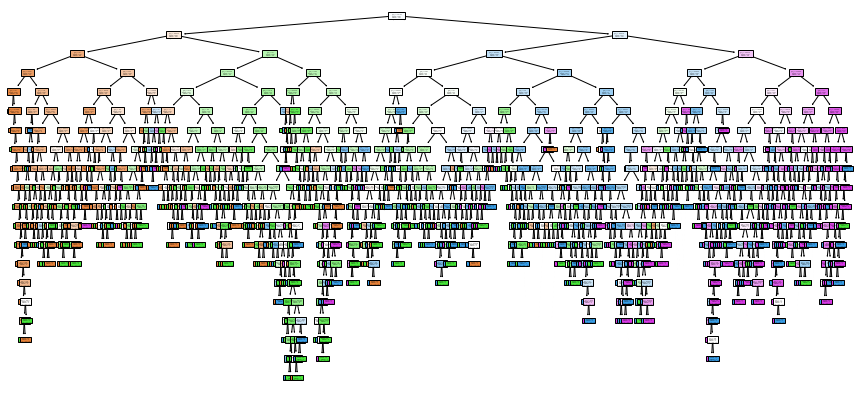

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model,filled=True)
plt.show()


Arrmemos un nuevo cliente y pedimos que el modelo lo clasifique

In [ ]:
#recordemos que las variables son names=['TV',	'antc',	'saldores','edad',	'estadoCiv', 'sexo','antig_pp','ingresos','endeud']
cliente_nuevo_1 = [0,100,5.000,60,2,2,45,80.000,25.000]
model.predict([cliente_nuevo_1])


array([1])

In [ ]:
model.predict_proba([cliente_nuevo_1])

array([[1., 0., 0., 0.]])

DecisionTreeClassifier proporciona parámetros como min_samples_leaf y max_depth para evitar que un árbol se ajuste en exceso. La poda usando una funcion de costo de la complejidad proporciona otra opción para controlar el tamaño de un árbol. En DecisionTreeClassifier, esta técnica de poda está parametrizada por el parámetro ccp_alpha. Los valores más altos de ccp_alpha aumentan el número de nodos podados.


In [ ]:
# Separar los datos en dos muestras. entrenamienot y testeo 80-20

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Accuracy scores')

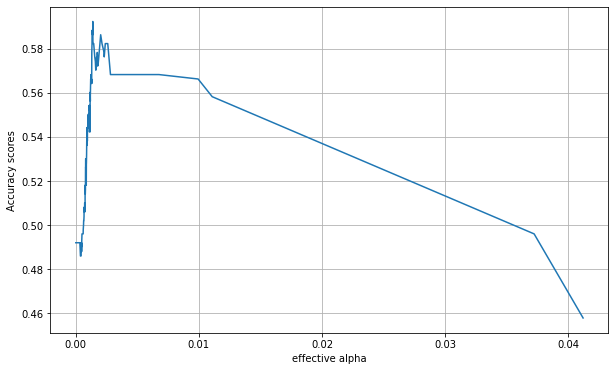

In [ ]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

Text(0, 0.5, 'total depth')

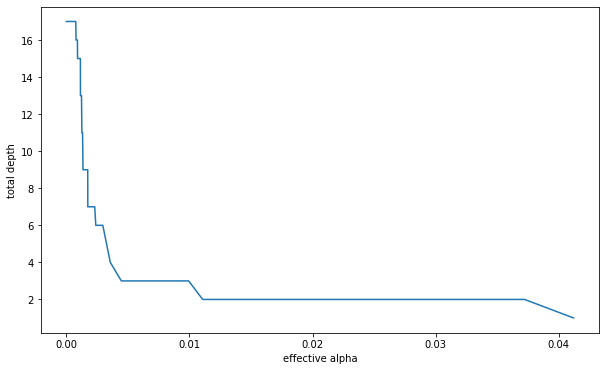

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

In [ ]:
model = DecisionTreeClassifier(random_state=42,criterion = 'entropy',max_depth=3).fit(X,y)

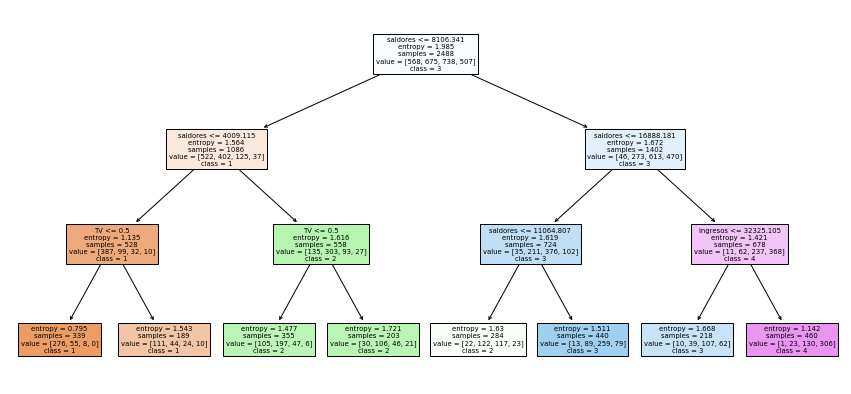

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model,feature_names=names, class_names=['1','2','3','4'],filled=True)
plt.show()